<a href="https://colab.research.google.com/github/zyberg2091/CV-tutorials/blob/master/Facial_Expression_Recognition/Facial_Expression_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install utils
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import utils

from tensorflow.keras.layers import Input,Flatten,Dropout,Dense,Conv2D,BatchNormalization,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from IPython.display import SVG

import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
#train images directory

os.mkdir('train_images')
os.mkdir('/content/train_images/angry')
os.mkdir('/content/train_images/disgust')
os.mkdir('/content/train_images/fear')
os.mkdir('/content/train_images/happy')
os.mkdir('/content/train_images/neutral')
os.mkdir('/content/train_images/sad')
os.mkdir('/content/train_images/surprise')


In [ ]:
len(fer_data)

28709

In [ ]:
#test images

os.mkdir('test_images')
os.mkdir('/content/test_images/angry')
os.mkdir('/content/test_images/disgust')
os.mkdir('/content/test_images/fear')
os.mkdir('/content/test_images/happy')
os.mkdir('/content/test_images/neutral')
os.mkdir('/content/test_images/sad')
os.mkdir('/content/test_images/surprise')

In [ ]:
import cv2
import csv

import pandas as pd




fer_data=pd.read_csv('train.csv',sep=',',encoding='utf-8',engine='python',error_bad_lines=False)
df=fer_data.iloc[:20000]



for index,row in df.iterrows():
  if row['emotion']==0:
    path="/content/train_images/angry"
    pixels=np.asarray(row['pixels'].split(' '),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join(path,str(index)+'.jpg')
    cv2.imwrite(pathname,img)
    print('image saved as {}'.format(pathname))
  if row['emotion']==1:
    path="/content/train_images/disgust"
    pixels=np.asarray(row['pixels'].split(' '),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join(path,str(index)+'.jpg')
    cv2.imwrite(pathname,img)
    print('image saved as {}'.format(pathname))
  if row['emotion']==2:
    path="/content/train_images/fear"
    pixels=np.asarray(row['pixels'].split(' '),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join(path,str(index)+'.jpg')
    cv2.imwrite(pathname,img)
    print('image saved as {}'.format(pathname))
  if row['emotion']==3:
    path="/content/train_images/happy"
    pixels=np.asarray(row['pixels'].split(' '),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join(path,str(index)+'.jpg')
    cv2.imwrite(pathname,img)
    print('image saved as {}'.format(pathname))
  if row['emotion']==4:
    path="/content/train_images/neutral"
    pixels=np.asarray(row['pixels'].split(' '),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join(path,str(index)+'.jpg')
    cv2.imwrite(pathname,img)
    print('image saved as {}'.format(pathname))
  if row['emotion']==5:
    path="/content/train_images/sad"
    pixels=np.asarray(row['pixels'].split(' '),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join(path,str(index)+'.jpg')
    cv2.imwrite(pathname,img)
    print('image saved as {}'.format(pathname))
  if row['emotion']==6:
    path="/content/train_images/surprise"
    pixels=np.asarray(row['pixels'].split(' '),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join(path,str(index)+'.jpg')
    cv2.imwrite(pathname,img)
    print('image saved as {}'.format(pathname))

Streaming output truncated to the last 5000 lines.
image saved as /content/train_images/fear/15001.jpg
image saved as /content/train_images/angry/15002.jpg
image saved as /content/train_images/fear/15003.jpg
image saved as /content/train_images/sad/15004.jpg
image saved as /content/train_images/angry/15005.jpg
image saved as /content/train_images/neutral/15006.jpg
image saved as /content/train_images/surprise/15007.jpg
image saved as /content/train_images/sad/15008.jpg
image saved as /content/train_images/neutral/15009.jpg
image saved as /content/train_images/neutral/15010.jpg
image saved as /content/train_images/sad/15011.jpg
image saved as /content/train_images/fear/15012.jpg
image saved as /content/train_images/surprise/15013.jpg
image saved as /content/train_images/angry/15014.jpg
image saved as /content/train_images/fear/15015.jpg
image saved as /content/train_images/fear/15016.jpg
image saved as /content/train_images/surprise/15017.jpg
image saved as /content/train_images/happy/1

In [ ]:
import shutil

shutil.rmtree('/content/test_images')


In [ ]:
fer_data_1=pd.read_csv('train.csv',sep=',',encoding='utf-8',engine='python',error_bad_lines=False)
df_1=fer_data_1.iloc[20000:]




for index,row in df_1.iterrows():
  if row['emotion']==0:
    path="/content/test_images/angry"
    pixels=np.asarray(row['pixels'].split(' '),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join(path,str(index)+'.jpg')
    cv2.imwrite(pathname,img)
    print('image saved as {}'.format(pathname))
  if row['emotion']==1:
    path="/content/test_images/disgust"
    pixels=np.asarray(row['pixels'].split(' '),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join(path,str(index)+'.jpg')
    cv2.imwrite(pathname,img)
    print('image saved as {}'.format(pathname))
  if row['emotion']==2:
    path="/content/test_images/fear"
    pixels=np.asarray(row['pixels'].split(' '),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join(path,str(index)+'.jpg')
    cv2.imwrite(pathname,img)
    print('image saved as {}'.format(pathname))
  if row['emotion']==3:
    path="/content/test_images/happy"
    pixels=np.asarray(row['pixels'].split(' '),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join(path,str(index)+'.jpg')
    cv2.imwrite(pathname,img)
    print('image saved as {}'.format(pathname))
  if row['emotion']==4:
    path="/content/test_images/neutral"
    pixels=np.asarray(row['pixels'].split(' '),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join(path,str(index)+'.jpg')
    cv2.imwrite(pathname,img)
    print('image saved as {}'.format(pathname))
  if row['emotion']==5:
    path="/content/test_images/sad"
    pixels=np.asarray(row['pixels'].split(' '),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join(path,str(index)+'.jpg')
    cv2.imwrite(pathname,img)
    print('image saved as {}'.format(pathname))
  if row['emotion']==6:
    path="/content/test_images/surprise"
    pixels=np.asarray(row['pixels'].split(' '),dtype=np.uint8)
    img=pixels.reshape((48,48))
    pathname=os.path.join(path,str(index)+'.jpg')
    cv2.imwrite(pathname,img)
    print('image saved as {}'.format(pathname))

Streaming output truncated to the last 5000 lines.
image saved as /content/test_images/neutral/23710.jpg
image saved as /content/test_images/happy/23711.jpg
image saved as /content/test_images/neutral/23712.jpg
image saved as /content/test_images/surprise/23713.jpg
image saved as /content/test_images/surprise/23714.jpg
image saved as /content/test_images/neutral/23715.jpg
image saved as /content/test_images/happy/23716.jpg
image saved as /content/test_images/sad/23717.jpg
image saved as /content/test_images/fear/23718.jpg
image saved as /content/test_images/surprise/23719.jpg
image saved as /content/test_images/neutral/23720.jpg
image saved as /content/test_images/neutral/23721.jpg
image saved as /content/test_images/surprise/23722.jpg
image saved as /content/test_images/happy/23723.jpg
image saved as /content/test_images/sad/23724.jpg
image saved as /content/test_images/surprise/23725.jpg
image saved as /content/test_images/happy/23726.jpg
image saved as /content/test_images/fear/2372

In [ ]:
print(len(os.listdir('/content/test_images/angry')))
print(len(os.listdir('/content/test_images/disgust')))
print(len(os.listdir('/content/test_images/fear')))
print(len(os.listdir('/content/test_images/happy')))
print(len(os.listdir('/content/test_images/neutral')))
print(len(os.listdir('/content/test_images/sad')))
print(len(os.listdir('/content/test_images/surprise')))

1192
112
1181
2207
1473
1039
1505


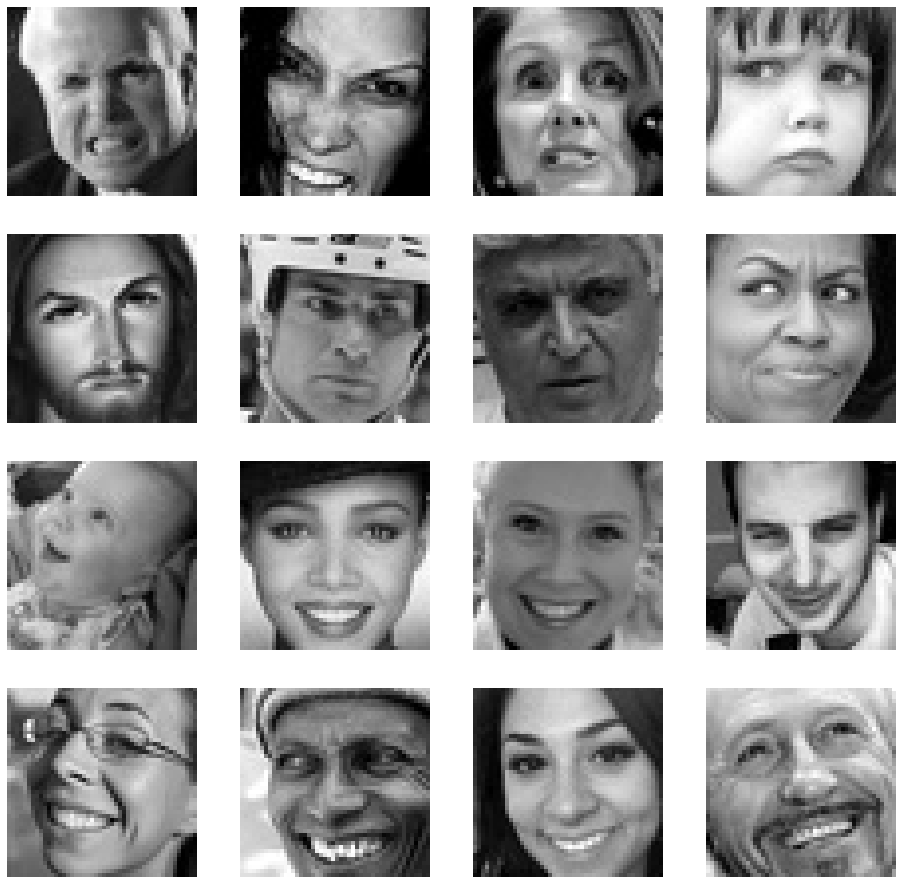

In [ ]:
#visualization of few examples(happy and angry faces)
import matplotlib.image as mpimg
train_ex=os.listdir('/content/train_images/angry')
train_ex1=os.listdir('/content/train_images/happy')
fig = plt.gcf()
fig.set_size_inches(16, 16)
pic_index = 8
next_angry_pic = [os.path.join('/content/train_images/angry', fname) 
                for fname in train_ex[pic_index-8:pic_index]]
next_happy_pic = [os.path.join('/content/train_images/happy', fname) 
                for fname in train_ex1[pic_index-8:pic_index]]

for i,img_path in enumerate(next_angry_pic+next_happy_pic):
     sp=plt.subplot(4,4,i+1)
     sp.axis('Off')
     img = mpimg.imread(img_path)
     plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
#generating batches and validation batches

image_data_generator=ImageDataGenerator(horizontal_flip=True)
train_generator=image_data_generator.flow_from_directory("/content/train_images",target_size=(48,48),color_mode='grayscale',batch_size=64)
validation_generator=image_data_generator.flow_from_directory("/content/test_images",target_size=(48,48),color_mode='grayscale',batch_size=64)


Found 20000 images belonging to 7 classes.
Found 8709 images belonging to 7 classes.


In [ ]:
#CNN architecture

i=Input(shape=(48,48,1))
x=Conv2D(64,(3,3),padding='same',activation='relu')(i)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Dropout(0.25)(x)
x=Conv2D(128,(3,3),padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Dropout(0.25)(x)
x=Conv2D(512,(3,3),padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Dropout(0.25)(x)
x=Conv2D(128,(3,3),padding='same',activation='relu')(x)
x=BatchNormalization()(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Dropout(0.25)(x)

x=Flatten()(x)
x=Dense(256,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.25)(x)

x=Dense(256,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.25)(x)

x=Dense(512,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.25)(x)

x=Dense(7,activation='sigmoid')(x)

model=Model(i,x)

model.compile(optimizer=Adam(lr=0.0005),loss='categorical_crossentropy',metrics='accuracy')

model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       512   

In [ ]:
#training and evaluating model
batch=64
steps_per_epoch=train_generator.n//batch
validation_steps=validation_generator.n//batch

checkpoint=ModelCheckpoint("model.weights.h5",monitor='val_accuracy',save_weights_only=True,mode='max',verbose=1)

r1=model.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=20,validation_data=validation_generator,validation_steps=validation_steps,callbacks=[checkpoint])

Epoch 1/20
310/312 [============================>.] - ETA: 0s - loss: 1.9123 - accuracy: 0.2105
Epoch 00001: saving model to model.weights.h5
312/312 [==============================] - 8s 25ms/step - loss: 1.9113 - accuracy: 0.2109 - val_loss: 1.7444 - val_accuracy: 0.3003
Epoch 2/20
310/312 [============================>.] - ETA: 0s - loss: 1.7442 - accuracy: 0.2980
Epoch 00002: saving model to model.weights.h5
312/312 [==============================] - 8s 24ms/step - loss: 1.7444 - accuracy: 0.2979 - val_loss: 1.5940 - val_accuracy: 0.3771
Epoch 3/20
312/312 [==============================] - ETA: 0s - loss: 1.6091 - accuracy: 0.3722
Epoch 00003: saving model to model.weights.h5
312/312 [==============================] - 8s 24ms/step - loss: 1.6091 - accuracy: 0.3722 - val_loss: 1.5802 - val_accuracy: 0.3873
Epoch 4/20
311/312 [============================>.] - ETA: 0s - loss: 1.5107 - accuracy: 0.4109
Epoch 00004: saving model to model.weights.h5
312/312 [===========================

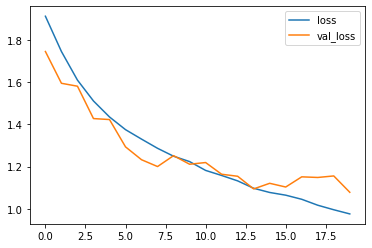

In [ ]:
plt.plot(r1.history['loss'],label='loss')
plt.plot(r1.history['val_loss'],label='val_loss')
plt.legend()

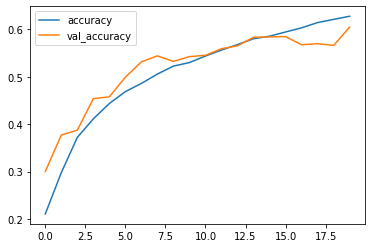

In [ ]:
plt.plot(r1.history['accuracy'],label='accuracy')
plt.plot(r1.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
#representing model as JSON file
model_json=model.to_json()
with open('model_json','w') as w:
  w.write(model_json)